In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
print(X.shape, y.shape)


(70000, 784) (70000,)


In [93]:
X = X / 255.0
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [94]:
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_scaled)

In [95]:

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=42)
clusters = kmeans.fit_predict(X_pca)


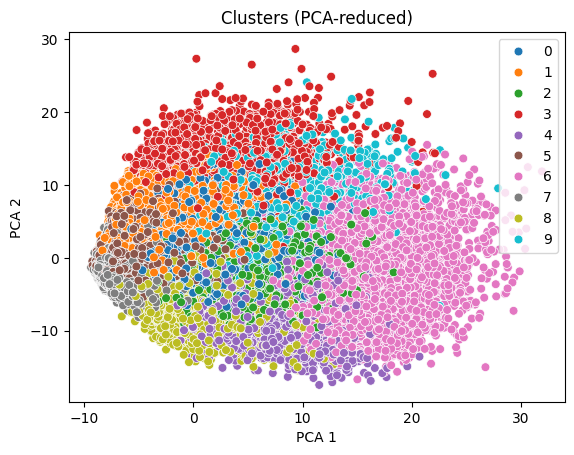

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='tab10', s=40)
plt.title("Clusters (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


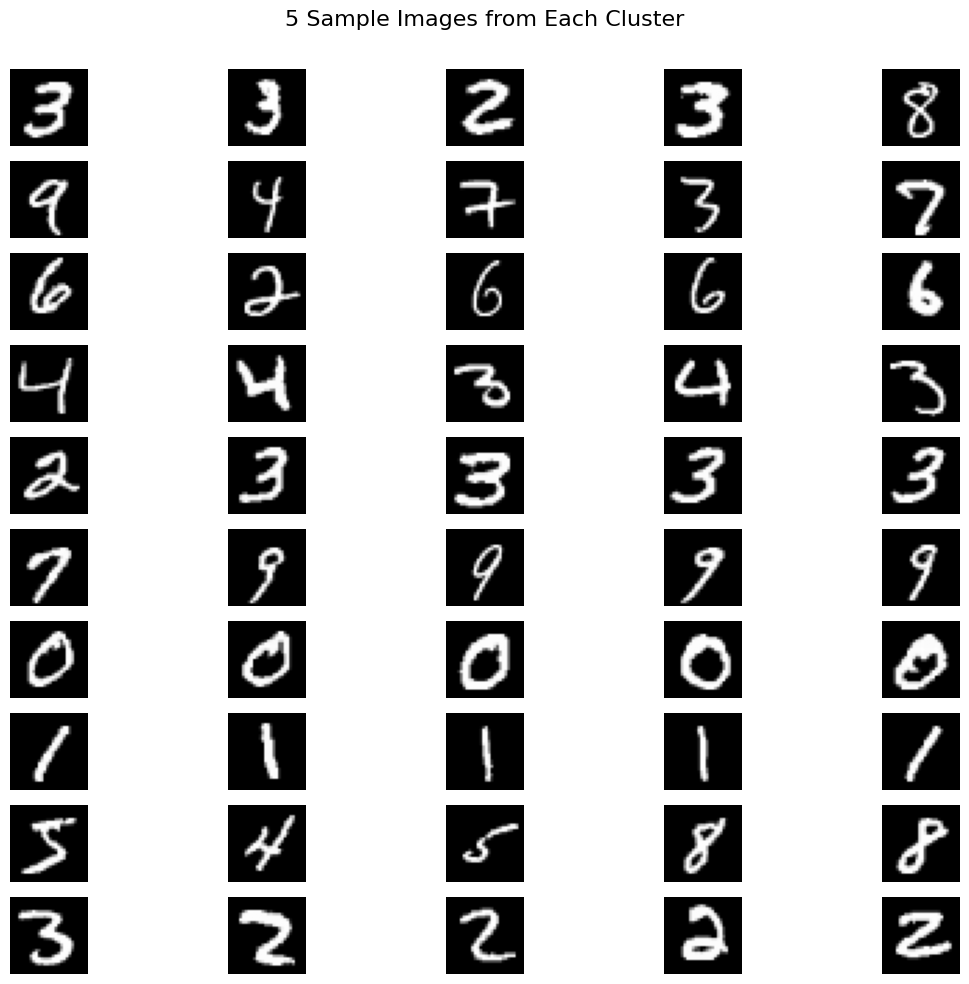

In [97]:
import numpy as np

plt.figure(figsize=(12, 10))
for cluster_id in range(10):
    idxs = np.where(clusters == cluster_id)[0][:5]
    for j, idx in enumerate(idxs):
        plt.subplot(10, 5, cluster_id * 5 + j + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.ylabel(f'Cluster {cluster_id}', fontsize=10)

plt.suptitle("5 Sample Images from Each Cluster", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
